<a href="https://colab.research.google.com/github/monikaselvam0110/Plant-disease-classification/blob/main/trained%20model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import os
import json
from zipfile import ZipFile
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator



In [ ]:
from tensorflow.keras import layers, models


In [ ]:
!pip install kaggle

In [ ]:
kaggle_credentails=json.load(open('/content/drive/MyDrive/kaggle.json'))

In [ ]:
os.environ['KAGGLE_USERNAME']=kaggle_credentails['username']
os.environ['KAGGLE_KEY']=kaggle_credentails['key']

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset


Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
 97% 1.97G/2.04G [00:16<00:01, 37.6MB/s]
100% 2.04G/2.04G [00:16<00:00, 135MB/s] 


In [ ]:
!ls

drive  plantvillage-dataset.zip  sample_data


In [ ]:
!unzip plantvillage-dataset.zip -d plantvillage


Streaming output truncated to the last 5000 lines.
  inflating: plantvillage/plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e345153-aed9-4879-a2cc-24f9dc5100e7___UF.GRC_YLCV_Lab 01798_final_masked.jpg  
  inflating: plantvillage/plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e37e8ad-3944-4e11-bc10-dd82616274d7___YLCV_NREC 2915_final_masked.jpg  
  inflating: plantvillage/plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e382244-fb3a-4caa-af71-05fff25f1c27___UF.GRC_YLCV_Lab 03397_final_masked.jpg  
  inflating: plantvillage/plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e3b9886-ce13-49d5-8f80-ccf4e5ddbeac___YLCV_GCREC 5479_final_masked.jpg  
  inflating: plantvillage/plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Curl_Virus/6e615038-7a87-446a-a2cd-f76c5c75b6dd___YLCV_GCREC 5144_final_masked.jpg  
  inflating: plantvillage/plantvillage dataset/segmented/Tomato___Tomato_Yellow_Leaf_Cur

In [ ]:
import os
os.listdir("/content/plantvillage")



['plantvillage dataset']

In [ ]:
for root, dirs, files in os.walk("plantvillage"):
    print(root)


plantvillage
plantvillage/plantvillage dataset
plantvillage/plantvillage dataset/color
plantvillage/plantvillage dataset/color/Pepper,_bell___healthy
plantvillage/plantvillage dataset/color/Potato___Early_blight
plantvillage/plantvillage dataset/color/Tomato___Spider_mites Two-spotted_spider_mite
plantvillage/plantvillage dataset/color/Tomato___Target_Spot
plantvillage/plantvillage dataset/color/Tomato___Tomato_mosaic_virus
plantvillage/plantvillage dataset/color/Tomato___Late_blight
plantvillage/plantvillage dataset/color/Tomato___healthy
plantvillage/plantvillage dataset/color/Cherry_(including_sour)___healthy
plantvillage/plantvillage dataset/color/Grape___Black_rot
plantvillage/plantvillage dataset/color/Peach___Bacterial_spot
plantvillage/plantvillage dataset/color/Blueberry___healthy
plantvillage/plantvillage dataset/color/Apple___Apple_scab
plantvillage/plantvillage dataset/color/Tomato___Leaf_Mold
plantvillage/plantvillage dataset/color/Apple___healthy
plantvillage/plantvillage

In [ ]:
print(len(os.listdir("plantvillage/plantvillage dataset/segmented")))
print(os.listdir("plantvillage/plantvillage dataset/segmented")[0:])
print(len(os.listdir("plantvillage/plantvillage dataset/color")))
print(os.listdir("plantvillage/plantvillage dataset/color")[0:])
print(len(os.listdir("plantvillage/plantvillage dataset/grayscale")))
print(os.listdir("plantvillage/plantvillage dataset/grayscale")[0:])


38
['Pepper,_bell___healthy', 'Potato___Early_blight', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Late_blight', 'Tomato___healthy', 'Cherry_(including_sour)___healthy', 'Grape___Black_rot', 'Peach___Bacterial_spot', 'Blueberry___healthy', 'Apple___Apple_scab', 'Tomato___Leaf_Mold', 'Apple___healthy', 'Apple___Cedar_apple_rust', 'Strawberry___Leaf_scorch', 'Orange___Haunglongbing_(Citrus_greening)', 'Tomato___Early_blight', 'Peach___healthy', 'Grape___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Potato___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Tomato___Bacterial_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Cherry_(including_sour)___Powdery_mildew', 'Strawberry___healthy', 'Pepper,_bell___Bacterial_spot', 'Grape___Esca_(Black_Measles)

In [ ]:
base_dir = '/content/plantvillage/plantvillage dataset/color'

Image size: (256, 256, 3)


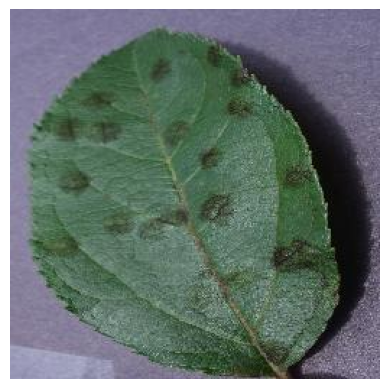

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg  # ✅ correct import

image_path = "/content/plantvillage/plantvillage dataset/color/Apple___Apple_scab/073b509f-c1ea-4e61-881b-2e874c5f4199___FREC_Scab 3286.JPG"

img = mpimg.imread(image_path)   # ✅ use mpimg instead of mp.img
print("Image size:", img.shape)

plt.imshow(img)
plt.axis('off')
plt.show()


In [ ]:
print(img)

[[[130 124 158]
  [128 122 156]
  [126 120 154]
  ...
  [110 105 137]
  [103  98 130]
  [ 98  93 125]]

 [[127 121 155]
  [127 121 155]
  [127 121 155]
  ...
  [112 107 139]
  [113 108 140]
  [114 109 141]]

 [[126 120 154]
  [126 120 154]
  [127 121 155]
  ...
  [112 107 139]
  [115 110 142]
  [116 111 143]]

 ...

 [[150 149 180]
  [150 149 180]
  [149 148 179]
  ...
  [136 128 151]
  [125 117 140]
  [111 103 126]]

 [[149 148 179]
  [149 148 179]
  [150 149 180]
  ...
  [119 111 134]
  [123 115 138]
  [132 124 147]]

 [[151 150 181]
  [152 151 182]
  [153 152 183]
  ...
  [141 133 156]
  [136 128 151]
  [110 102 125]]]


In [ ]:
img_size=224
batch_size=36

In [ ]:

# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)


In [ ]:
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)


Found 43456 images belonging to 38 classes.


In [ ]:
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

In [ ]:
#mobile net
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout, Input
from tensorflow.keras.optimizers import Adam
base_model = MobileNetV2(
    input_shape=(img_size, img_size, 3),
    include_top=False,  # Don't include the default classification head
    weights='imagenet'  # Use ImageNet pre-trained weights
)

base_model.trainable = False  # Freeze the base model


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x = base_model.output
x = GlobalAveragePooling2D()(x)     # Reduces each feature map to 1 value
x = Dropout(0.3)(x)                  # Add dropout for regularization
x = Dense(128, activation='relu')(x)
x = Dropout(0.2)(x)
output = Dense(train_generator.num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [ ]:
model.summary()

In [ ]:
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=25
)


Evaluating model...
301/301 ━━━━━━━━━━━━━━━━━━━━ 19s 62ms/step - accuracy: 0.9721 - loss: 0.0858
Validation Accuracy: 95.84%


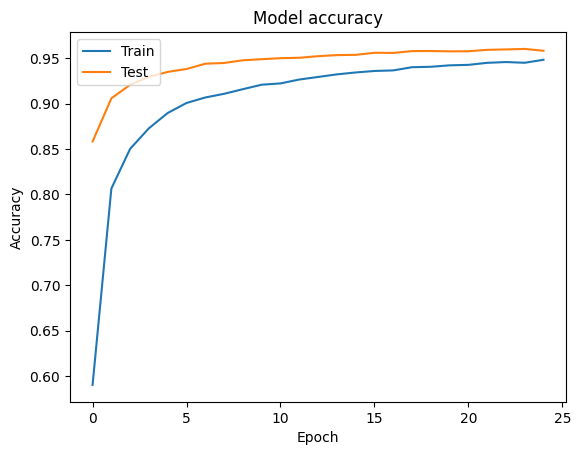

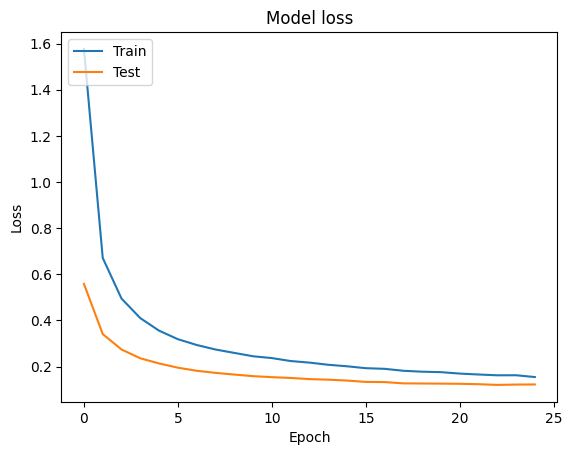

In [ ]:
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(val_generator, steps=val_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
 # Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


In [ ]:
#vgg 16
'''from tensorflow.keras import models, layers

model_vgg = models.Sequential()

model_vgg.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(img_size, img_size, 3)))
model_vgg.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model_vgg.add(layers.MaxPooling2D((2, 2)))

model_vgg.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model_vgg.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
model_vgg.add(layers.MaxPooling2D((2, 2)))

model_vgg.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model_vgg.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
model_vgg.add(layers.MaxPooling2D((2, 2)))

model_vgg.add(layers.Flatten())
model_vgg.add(layers.Dense(512, activation='relu'))
model_vgg.add(layers.Dropout(0.5))
model_vgg.add(layers.Dense(train_generator.num_classes, activation='softmax'))


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
#model_vgg.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 200704)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 512)            │   102,760,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 38)             │        19,494 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 103,925,862 (396.45 MB)

 Trainable params: 103,925,862 (396.45 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
'''model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
'''history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=10,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/10
1207/1207 ━━━━━━━━━━━━━━━━━━━━ 94s 76ms/step - accuracy: 0.9805 - loss: 0.0608 - val_accuracy: 0.8866 - val_loss: 0.5257
Epoch 2/10
   1/1207 ━━━━━━━━━━━━━━━━━━━━ 1:15 63ms/step - accuracy: 1.0000 - loss: 0.0035

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


1207/1207 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 1.0000 - loss: 0.0035 - val_accuracy: 0.8858 - val_loss: 0.5270
Epoch 3/10
1207/1207 ━━━━━━━━━━━━━━━━━━━━ 125s 75ms/step - accuracy: 0.9898 - loss: 0.0340 - val_accuracy: 0.8658 - val_loss: 0.7155
Epoch 4/10
1207/1207 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 1.0000 - loss: 0.0222 - val_accuracy: 0.8670 - val_loss: 0.7091
Epoch 5/10
1207/1207 ━━━━━━━━━━━━━━━━━━━━ 126s 75ms/step - accuracy: 0.9860 - loss: 0.0457 - val_accuracy: 0.8661 - val_loss: 0.7205
Epoch 6/10
1207/1207 ━━━━━━━━━━━━━━━━━━━━ 20s 16ms/step - accuracy: 0.9722 - loss: 0.0315 - val_accuracy: 0.8701 - val_loss: 0.6984
Epoch 7/10
1207/1207 ━━━━━━━━━━━━━━━━━━━━ 120s 73ms/step - accuracy: 0.9883 - loss: 0.0375 - val_accuracy: 0.8750 - val_loss: 0.6803
Epoch 8/10
1207/1207 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 0.9722 - loss: 0.0225 - val_accuracy: 0.8738 - val_loss: 0.6878
Epoch 9/10
1207/1207 ━━━━━━━━━━━━━━━━━━━━ 125s 73ms/step - accuracy: 0.9918 - loss: 

Evaluating model...
301/301 ━━━━━━━━━━━━━━━━━━━━ 17s 55ms/step - accuracy: 0.8590 - loss: 0.8112
Validation Accuracy: 85.76%


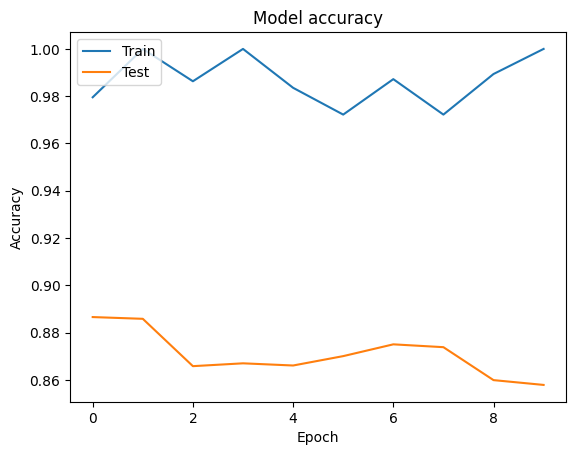

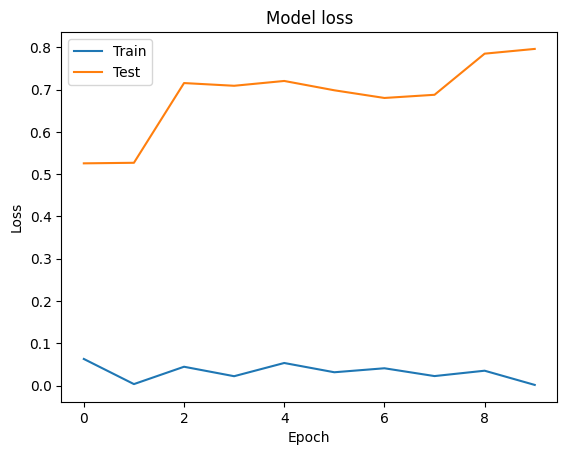

In [ ]:
'''print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
     # Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
#resnet
'''from tensorflow.keras import layers, models, Input

def residual_block(x, filters, kernel_size=3):
    shortcut = x
    x = layers.Conv2D(filters, kernel_size, padding='same', activation='relu')(x)
    x = layers.Conv2D(filters, kernel_size, padding='same')(x)
    x = layers.Add()([shortcut, x])
    x = layers.Activation('relu')(x)
    return x

input_layer = Input(shape=(img_size, img_size, 3))
x = layers.Conv2D(64, (7,7), strides=2, padding='same', activation='relu')(input_layer)
x = layers.MaxPooling2D((3,3), strides=2, padding='same')(x)

x = residual_block(x, 64)
x = residual_block(x, 64)

x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dropout(0.5)(x)
output_layer = layers.Dense(train_generator.num_classes, activation='softmax')(x)

model_resnet_like = models.Model(inputs=input_layer, outputs=output_layer)


In [ ]:
#model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 38)             │         9,766 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 143,415,476 (547.09 MB)

 Trainable params: 47,805,158 (182.36 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 95,610,318 (364.72 MB)

In [ ]:
'''model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=10,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/10
1207/1207 ━━━━━━━━━━━━━━━━━━━━ 98s 79ms/step - accuracy: 0.9898 - loss: 0.0328 - val_accuracy: 0.8561 - val_loss: 0.9711
Epoch 2/10
1207/1207 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 1.0000 - loss: 0.0119 - val_accuracy: 0.8557 - val_loss: 0.9835
Epoch 3/10
1207/1207 ━━━━━━━━━━━━━━━━━━━━ 90s 74ms/step - accuracy: 0.9917 - loss: 0.0275 - val_accuracy: 0.8585 - val_loss: 0.9301
Epoch 4/10
1207/1207 ━━━━━━━━━━━━━━━━━━━━ 16s 13ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 0.8583 - val_loss: 0.9297
Epoch 5/10
1207/1207 ━━━━━━━━━━━━━━━━━━━━ 143s 118ms/step - accuracy: 0.9934 - loss: 0.0238 - val_accuracy: 0.8589 - val_loss: 0.9806
Epoch 6/10
1207/1207 ━━━━━━━━━━━━━━━━━━━━ 17s 14ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.8549 - val_loss: 1.0078
Epoch 7/10
1207/1207 ━━━━━━━━━━━━━━━━━━━━ 91s 75ms/step - accuracy: 0.9926 - loss: 0.0251 - val_accuracy: 0.8743 - val_loss: 0.8964
Epoch 8/10
1207/1207 ━━━━━━━━━━━━━━━━━━━━ 15s 13ms/step - accuracy: 1.0000

Evaluating model...
301/301 ━━━━━━━━━━━━━━━━━━━━ 17s 57ms/step - accuracy: 0.8521 - loss: 1.1337
Validation Accuracy: 85.84%


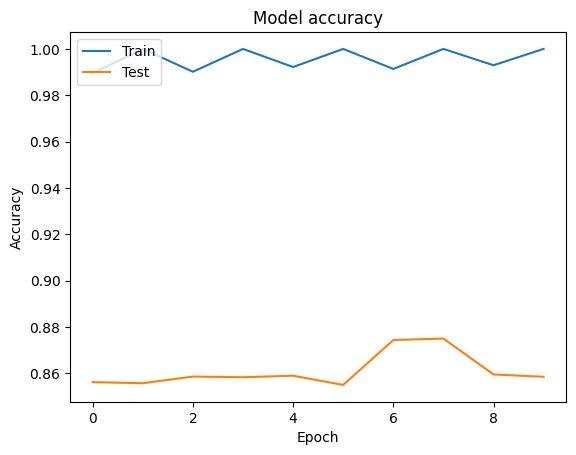

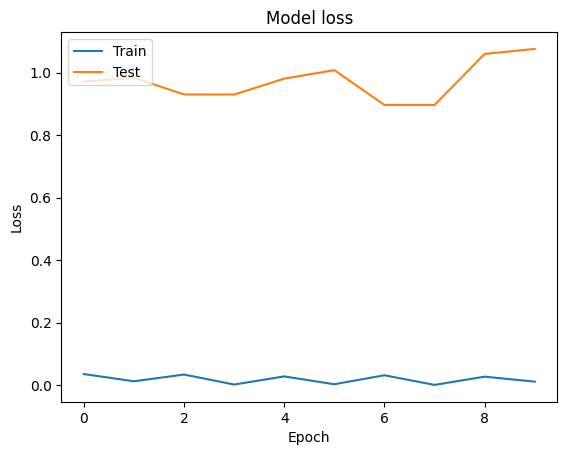

In [ ]:
'''print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")
     # Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [ ]:
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name


In [ ]:
class_indices = {v: k for k, v in train_generator.class_indices.items()

SyntaxError: incomplete input (ipython-input-1391612158.py, line 1)

In [ ]:
class_indices


NameError: name 'class_indices' is not defined

In [ ]:

# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))